In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import skimage.io 
import slgbuilder
from PIL import Image

# This is to fix deprecated alias in numpy, but still used in slgbuilder
np.bool = bool
np.int = int

import sys
sys.path.insert(1, '..')
from functions import *

PATH = 'data/'

## Exam 2022

The segmentation line is: [1 1 1 1 1 1 1 1 1 1]
The value path is given as: [43. 25. 56. 66. 21. 21. 32. 21. 39. 53.]
The sum of the value path is given as: 377.0
The segmentation line is: [4 3 0 0 1 0 1 1 1 3]
The value path is given as: [21. 11. 14. 30. 21. 12. 32. 21. 39. 22.]
The sum of the value path is given as: 223.0
The mean between the two paths is: 1.0


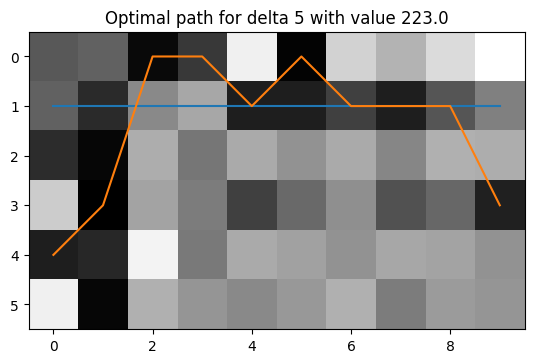

In [10]:
I = np.loadtxt('../exam_data/exam2022/cost.txt')
delta = 0
surface_cost = I  # Example: invert the cost so lower values become higher cost
layer = slgbuilder.GraphObject(surface_cost)

helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta, wrap=False)

helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1
value_path = I[segmentation_line, np.arange(I.shape[1])]
value = np.sum(value_path)

print(f'The segmentation line is: {segmentation_line}')
print(f'The value path is given as: {value_path}')
print(f'The sum of the value path is given as: {value}')

plt.imshow(I, cmap='gray')
plt.plot(np.arange(len(segmentation_line)), segmentation_line)
plt.title(f'Optimal path for delta {delta} with value {value}')

segmentation_line_0 = segmentation_line.copy()

delta = 5
surface_cost = I  # Example: invert the cost so lower values become higher cost
layer = slgbuilder.GraphObject(surface_cost)

helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta, wrap=False)

helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1

value_path = I[segmentation_line, np.arange(I.shape[1])]
value = np.sum(value_path)

print(f'The segmentation line is: {segmentation_line}')
print(f'The value path is given as: {value_path}')
print(f'The sum of the value path is given as: {value}')

plt.imshow(I, cmap='gray')
plt.plot(np.arange(len(segmentation_line)), segmentation_line)
plt.title(f'Optimal path for delta {delta} with value {value}')

segmentation_line_5 = segmentation_line.copy()

print(f'The mean between the two paths is: {np.mean(np.abs(segmentation_line_0 - segmentation_line_5))}')

Exam 2023

In [ ]:
I = np.array([[6, 9, 6, 5, 2, 3, 9],
              [7, 8, 3, 7, 4, 6, 1],
              [2, 8, 5, 6, 9, 5, 4],
              [6, 7, 8, 1, 4, 6, 9],
              [1, 8, 8, 4, 6, 2, 6],
              [5, 2, 3, 7, 3, 6, 8]])
# To change the surface cost, modify the array passed to slgbuilder.GraphObject.
# For example, to use a different cost matrix (e.g., penalize high values more):
delta = 1
surface_cost = np.abs(I-5)  # Example: invert the cost so lower values become higher cost
layer = slgbuilder.GraphObject(surface_cost)

helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta, wrap=False)

helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1

value_path = I[segmentation_line, np.arange(I.shape[1])]
value = np.sum(value_path)

print(f'The segmentation line is: {segmentation_line}')
print(f'The value path is given as: {value_path}')
print(f'The sum of the value path is given as: {value}')

plt.imshow(I, cmap='gray')
plt.plot(np.arange(len(segmentation_line)), segmentation_line)
plt.title(f'Optimal path for delta {delta} with value {value}')
